<a href="https://colab.research.google.com/github/BhargavPalaketi/MachineLearning/blob/main/housePricePredwithoutSKlearnmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
#path = "https://raw.githubusercontent.com/BhargavPalaketi/MachineLearning/main/SupervisedLearning/Regression/Multivariate%20Regression/Datasets/kc_house_data.csv"
#data = pd.read_csv(path)
#data.head()

In [153]:
url ="https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
data = pd.read_csv(url,header=None)

In [154]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [155]:
correlation_matrix = data.corr()
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [156]:
data.dtypes

0     float64
1     float64
2     float64
3       int64
4     float64
5     float64
6     float64
7     float64
8       int64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object

Text(0, 0.5, 'price')

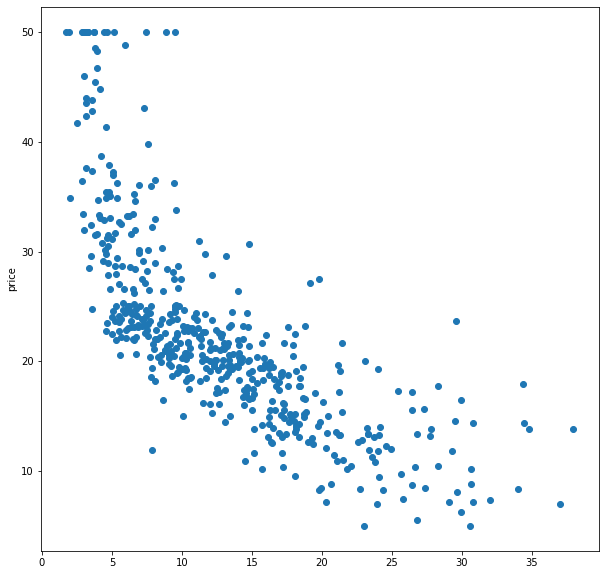

In [157]:
plt.figure(figsize=(10,10))
plt.plot(data[12],data[13],'o')
plt.ylabel('price')

In [158]:
# kc house data set
#data = data.drop(['id','date'], axis =1)
#print(data.shape)
#data.head()

In [159]:
#X = data.iloc[:, data.columns != 'price'] 
#y = data['price']

In [164]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [165]:
print(X.shape)
X.head()

(506, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


 ## <p> Hypothesis: Since we have multiple independent features we need to use multivariate Regression <br> hypothesis look like ℎ𝜃(x) = 𝜃0x0 + 𝜃1x1 + 𝜃2𝑥2 + 𝜃3𝑥3 + ⋯ + 𝜃𝑛𝑥𝑛

In [166]:
#X.shape[0]
#X_0 = np.c_[np.ones((X.shape[0],1)),X]
#X_0.shape

In [167]:
#X_0

 ### Normal Equation <br>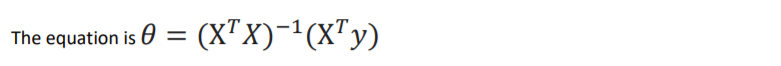

In [168]:
def normalequation(X,y):
  #pinv = (X^T*X)^-1*X^T
  pinv = np.linalg.inv(np.matmul(X.T,X))
  ne = np.matmul(pinv,np.matmul(X.T,y))
  return ne

 ### Split data  

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X, y, random_state = 0 )

In [170]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

In [171]:
X_train_0.shape

(379, 14)

In [172]:
theta = normalequation(X_train_0,y_train)
theta.shape

(14,)

In [173]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [174]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,36.933255,36.933255
1,theta_1,0,-0.117735,-0.117735
2,theta_2,1,0.044017,0.044017
3,theta_3,2,-0.005768,-0.005768
4,theta_4,3,2.393416,2.393416
5,theta_5,4,-15.589421,-15.589421
6,theta_6,5,3.768968,3.768968
7,theta_7,6,-0.007035,-0.007035
8,theta_8,7,-1.434956,-1.434956
9,theta_9,8,0.240081,0.240081


In [175]:
print(X_train.shape)
print(theta.shape)

(379, 13)
(14,)


In [176]:
def hypotheis(X,theta):
  f = np.matmul(X,theta)
  return f


In [177]:
y_pred_norm = hypotheis(X_test_0,theta) 

In [178]:
print(y_pred_norm)

[24.95233283 23.61699724 29.20588553 11.96070515 21.33362042 19.46954895
 20.42228421 21.52044058 18.98954101 19.950983    4.92468244 16.09694058
 16.93599574  5.33508402 39.84434398 32.33549843 22.32772572 36.54017819
 31.03300611 23.32172503 24.92086498 24.26106474 20.71504422 30.45072552
 22.45009234  9.87470006 17.70324412 17.974775   35.69932012 20.7940972
 18.10554174 17.68317865 19.71354713 23.79693873 29.06528958 19.23738284
 10.97815878 24.56199978 17.32913052 15.20340817 26.09337458 20.87706795
 22.26187518 15.32582693 22.85847963 25.08887173 19.74138819 22.70744911
  9.66708558 24.46175926 20.72654169 17.52545047 24.45596997 30.10668865
 13.31250981 21.52052342 20.65642932 15.34285652 13.7741129  22.07429287
 17.53293957 21.60707766 32.91050188 31.32796114 17.64346364 32.69909854
 18.56579207 19.32110821 18.81256692 23.04351442 22.81649956 23.99800754
 30.62733254 28.8662207  25.78198145  5.00689605 36.83409088 23.80490328
 27.36965299 19.33057146 28.51439846 19.19147448 18.

In [179]:
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  29.782245092301068
R square obtain for normal equation method is : 0.6354638433202288
